<a href="https://colab.research.google.com/github/CIRdata/CO2/blob/master/CO2_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wget >nul 2>&1
import wget
import pandas as pd
import os
import matplotlib.pyplot as plt


#### Load CO2 Emissions Data


In [2]:
fe = 'annual-co-emissions-by-region.csv'
if os.path.exists(fe): os.remove(fe)
url = 'https://raw.githubusercontent.com/CIRdata/CO2/master/annual-co-emissions-by-region.csv'
wget.download(url,fe)

dfe = pd.read_csv(fe)
dfe.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
dfe.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

In [0]:
set(dfe.Entity)

When we look at the Entities in the emissions by region table from the ourworlddata.org website, we see that there are a lot of Entities that would be counted twice, for example there are entities for both Africa and Kenya. So it looks like this table contains both continental as well as national totals.

Looking at the chart from ourworlddata.org we see that they filter the data for the folowing entities when presenting totals:
* Statistical differences
* International transport
* Asia and Pacific (other)
* China
* India
* Africa
* Middle East
* Americas (other)
* United States
* Europe (other)
* EU-28

We will do the same.

In [5]:
df_entities = pd.DataFrame(['Statistical differences', 'International transport', 'Asia and Pacific (other)', 'China', 'India', 'Africa', 'Middle East', 'Americas (other)', 'United States', 'Europe (other)', 'EU-28'])
df_entities.columns = ['Entity']
dfefilter = pd.merge(dfe, df_entities, left_on='Entity', right_on='Entity', how='inner', suffixes=('', '_filter'))
dfefilter.groupby(['Entity']).agg({'Year':['min','max','count'],'Annual CO₂ emissions (tonnes )':'sum'})

Year             Annual CO₂ emissions (tonnes )
                           min   max count                            sum
Entity                                                                   
Africa                    1751  2017   267                   4.311757e+10
Americas (other)          1751  2017   267                   9.864116e+10
Asia and Pacific (other)  1751  2017   267                   1.780573e+11
China                     1751  2017   254                   2.001365e+11
EU-28                     1751  2017   267                   3.528583e+11
Europe (other)            1751  2017   267                   1.575402e+11
India                     1751  2017   256                   4.855786e+10
International transport   1751  2017   267                   3.679791e+10
Middle East               1751  2017   267                   6.047323e+10
Statistical differences   1751  2017   267                  -7.713299e+09
United States             1751  2017   267                   3.993783e+11

In [6]:
dfefilter[dfefilter['Year']>1959].groupby(['Entity']).agg({'Year':['min','max','count'],'Annual CO₂ emissions (tonnes )':'sum'})

Year             Annual CO₂ emissions (tonnes )
                           min   max count                            sum
Entity                                                                   
Africa                    1960  2017    58                   4.023491e+10
Americas (other)          1960  2017    58                   8.602146e+10
Asia and Pacific (other)  1960  2017    58                   1.679740e+11
China                     1960  2017    58                   1.958306e+11
EU-28                     1960  2017    58                   2.327405e+11
Europe (other)            1960  2017    58                   1.387531e+11
India                     1960  2017    58                   4.557978e+10
International transport   1960  2017    58                   3.658455e+10
Middle East               1960  2017    58                   5.867105e+10
Statistical differences   1960  2017    58                  -7.845694e+09
United States             1960  2017    58                   2.833582e+11

In [7]:
dfefilter.columns=['Entity','Code','Year','Emissions']
dfefilter.head()


,Entity,Code,Year,Emissions
0,Africa,NaN,1751,0.0
1,Africa,NaN,1752,0.0
2,Africa,NaN,1753,0.0
3,Africa,NaN,1754,0.0
4,Africa,NaN,1755,0.0


We see that we have complete world emissions data for the 1960 to 2017 time period.

#### Emissions Trends 1960 to 2017

Text(0, 0.5, 'tonnes')

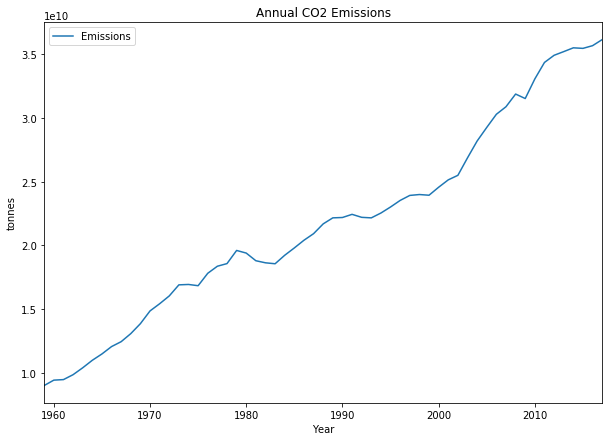

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

pd.DataFrame(dfefilter[dfefilter['Year']>1958].groupby('Year')['Emissions'].sum()).plot(ax=ax)
ax.set(title='Annual CO2 Emissions')
ax.set_ylabel('tonnes')


#### Load CO2 Concentrations

In [9]:
fc = 'co2_mm_mlo.txt'
if os.path.exists(fc): os.remove(fc)

url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'

wget.download(url, fc)

'co2_mm_mlo.txt'

In [0]:
#there's a bunch of comments at the top of the txt file, we count the #'s so we can skip those lines
f = open(fc,'r')
lines = f.readlines()
skip = 0
for l in lines:
  if l[0:1]=='#':
    skip = skip + 1

In [11]:
dfc = pd.read_fwf(fc, widths=[4,4,12,12,12,12,7], header=None, skiprows=skip)
dfc.columns=['year','mth','dec_date','average','interpolated','trend_seasoncorr','days']
dfc.head()

,year,mth,dec_date,average,interpolated,trend_seasoncorr,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [12]:
dfc.tail()

,year,mth,dec_date,average,interpolated,trend_seasoncorr,days
735,2019,6,2019.458,413.92,413.92,411.57,27
736,2019,7,2019.542,411.77,411.77,411.42,23
737,2019,8,2019.625,409.95,409.95,411.86,29
738,2019,9,2019.708,408.54,408.54,412.14,29
739,2019,10,2019.792,408.53,408.53,411.93,30


In [13]:
dfc.dtypes

year                  int64
mth                   int64
dec_date            float64
average             float64
interpolated        float64
trend_seasoncorr    float64
days                  int64
dtype: object

In [14]:
dfc.describe()

,year,mth,dec_date,average,interpolated,trend_seasoncorr,days
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,1988.500000,6.500000,1989.000000,350.628986,354.642068,354.638973,18.502703
std,17.815207,3.443925,17.813658,52.230657,28.215909,28.152422,12.197240
min,1958.000000,1.000000,1958.208000,-99.990000,312.660000,314.620000,-1.000000
25%,1973.000000,4.000000,1973.604250,328.622500,328.877500,329.870000,-1.000000
50%,1988.500000,6.500000,1989.000000,351.950000,351.950000,352.440000,25.000000
75%,2004.000000,9.000000,2004.395750,377.480000,377.480000,377.412500,28.000000
max,2019.000000,12.000000,2019.792000,414.660000,414.660000,412.140000,31.000000


We see that the data goes from March 1958 to October 2019.  The average has some missing values, but the interpolated and trend columns are complete.

In [0]:
dfc = dfc.set_index(['year','mth'])

In [0]:
dfc['prev_yr_diff'] = dfc.interpolated - dfc.shift(12)['interpolated']

#group by year and average
#we filter out 2019 and 1958 because those are incomplete years
#we filter out 1959 because the prev year comparison is with 1958, which is incomplete
#we filter out 2018 because we will eventually want to compair with the emissions
#  data which cuts off at 2017
dfcyr = dfc.loc[1960:2017].groupby(['year']).mean()

In [17]:
dfcyr.head()

,dec_date,average,interpolated,trend_seasoncorr,days,prev_yr_diff
year,,,,,,
1960,1960.5,316.907500,316.907500,316.907500,-1.0,0.933333
1961,1961.5,317.637500,317.637500,317.636667,-1.0,0.730000
1962,1962.5,318.450833,318.450833,318.450000,-1.0,0.813333
1963,1963.5,318.994167,318.994167,318.994167,-1.0,0.543333
1964,1964.5,214.405833,319.617500,319.621667,-1.0,0.623333


#### CO2 Atmospheric Levels Trends 1960 to 2017

Text(0, 0.5, 'ppm')

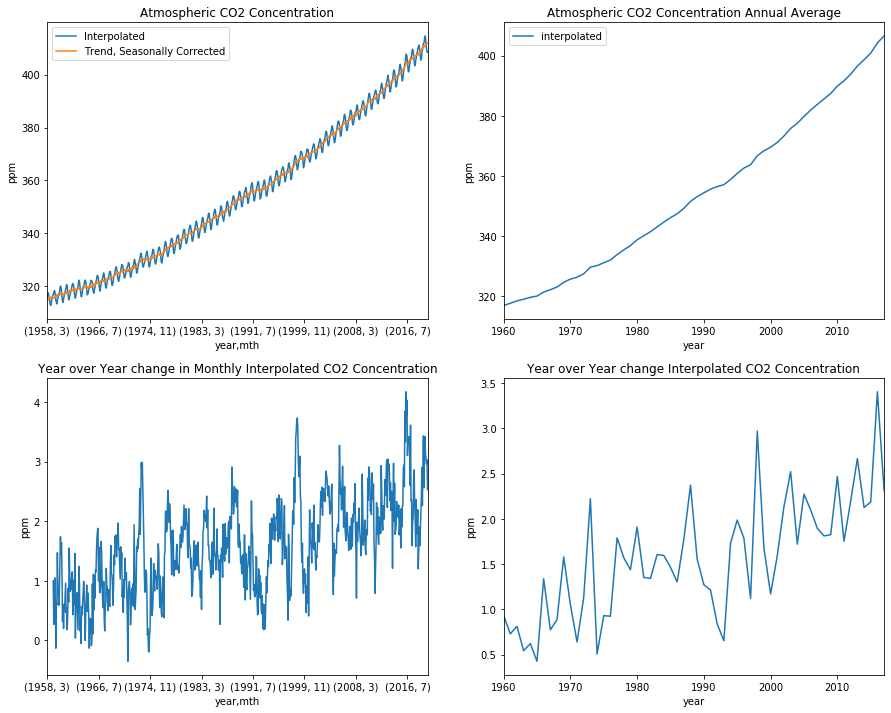

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))

dfc[['interpolated']].plot(ax=ax[0,0])
dfc[['trend_seasoncorr']].plot(ax=ax[0,0])
ax[0,0].set(title='Atmospheric CO2 Concentration')
ax[0,0].legend(['Interpolated','Trend, Seasonally Corrected'])
ax[0,0].set_ylabel('ppm')



dfc[['prev_yr_diff']].plot(ax=ax[1,0],legend=None)
ax[1,0].set(title='Year over Year change in Monthly Interpolated CO2 Concentration')
ax[1,0].set_ylabel('ppm')

dfcyr[['interpolated']].plot(ax=ax[0,1])
ax[0,1].set(title='Atmospheric CO2 Concentration Annual Average')
ax[0,1].set_ylabel('ppm')

dfcyr[['prev_yr_diff']].plot(ax=ax[1,1],legend=None)
ax[1,1].set(title='Year over Year change Interpolated CO2 Concentration')
ax[1,1].set_ylabel('ppm')


####Compairing Atmospheric CO2 Concentration to CO2 Emissions 1960 to 2017

In this section I will look at change in concentration in CO2 with the amount of CO2 emitted each year.

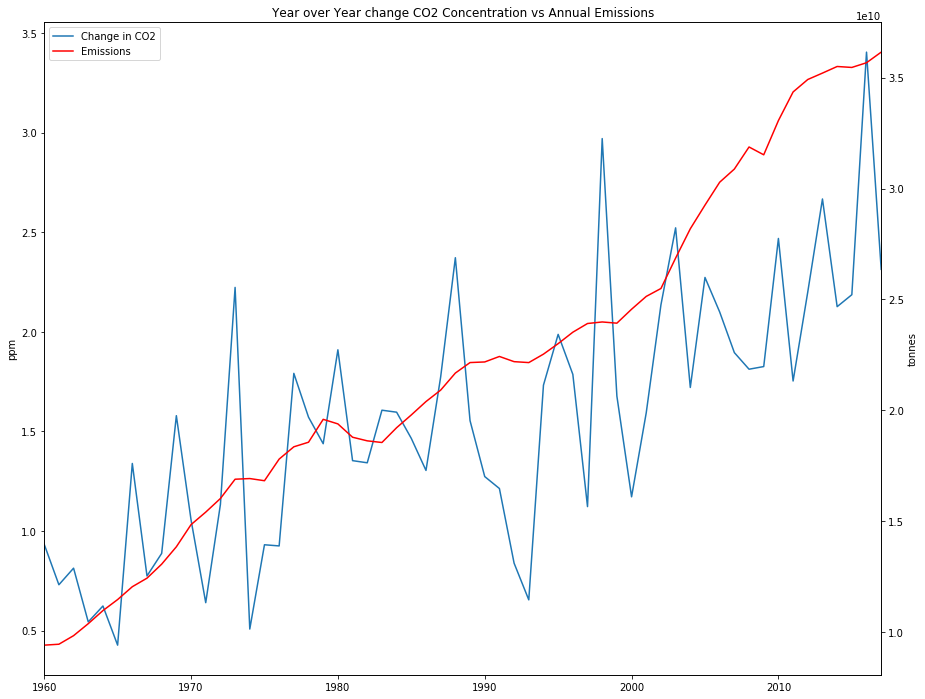

In [19]:
dfm = pd.merge(dfcyr[['prev_yr_diff']], pd.DataFrame(dfefilter[dfefilter['Year']>1958].groupby('Year')['Emissions'].sum()),how='inner',left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(15,12))

p1 = dfm[['prev_yr_diff']].plot(ax=ax, legend=None)
ax.set(title='Year over Year change CO2 Concentration vs Annual Emissions')
ax.set_ylabel('ppm')


axb = ax.twinx()

p2 = dfm['Emissions'].plot(ax=axb,color='red')
axb.set_ylabel('tonnes')

lines, labels = ax.get_legend_handles_labels()
linesb, labelsb = axb.get_legend_handles_labels()
axb.legend(lines + linesb, ['Change in CO2'] + labelsb, loc=0)

In [20]:
dfm.corr()

,prev_yr_diff,Emissions
prev_yr_diff,1.000000,0.740779
Emissions,0.740779,1.000000


r = 0.74 which is a pretty strong correlation